### A2 EDA: Discharge Notes and Concept Annotations

This notebook explores the structure and contents of the training/test discharge notes and their span annotations.

Goals:
- Load train/test notes and annotations
- Inspect schema and sample rows
- Validate span integrity and basic stats
- Visualize note lengths and annotations-per-note
- Explore `concept_id` frequencies and train/test overlap
- Render a few notes with highlighted annotation spans


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_colwidth', 200)

DATA_DIR = Path('/Users/aryamanbahl/Desktop/IIITH/M25/NLP-H/Assignments /nlph_assignments-/A2/Assignment 2 Dataset')

TRAIN_NOTES = DATA_DIR / 'training-notes.csv'
TRAIN_ANN = DATA_DIR / 'train-annotations.csv'
TEST_NOTES = DATA_DIR / 'test-notes.csv'
TEST_ANN = DATA_DIR / 'test-annotations.csv'

assert TRAIN_NOTES.exists() and TRAIN_ANN.exists() and TEST_NOTES.exists() and TEST_ANN.exists(), 'One or more dataset files are missing.'

print('Files found:', TRAIN_NOTES.name, TRAIN_ANN.name, TEST_NOTES.name, TEST_ANN.name)


Files found: training-notes.csv train-annotations.csv test-notes.csv test-annotations.csv


In [2]:
# Load CSVs
train_notes = pd.read_csv(TRAIN_NOTES)
train_ann = pd.read_csv(TRAIN_ANN)
test_notes = pd.read_csv(TEST_NOTES)
test_ann = pd.read_csv(TEST_ANN)

for name, df in [('train_notes', train_notes), ('train_ann', train_ann), ('test_notes', test_notes), ('test_ann', test_ann)]:
    print(f"{name}: shape={df.shape}")
    display(df.head(3))
    print('-' * 80)


train_notes: shape=(204, 2)


,note_id,text
0,10060142-DS-9,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: M\n \nService: SURGERY\n \nAllergies: \nPenicil...
1,10097089-DS-8,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: M\n \nService: MEDICINE\n \nAllergies: \nNo Kno...
2,10124346-DS-4,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: F\n \nService: MEDICINE\n \nAllergies: \nSanctura X...


--------------------------------------------------------------------------------
train_ann: shape=(51574, 4)


,note_id,start,end,concept_id
0,10060142-DS-9,179,190,91936005
1,10060142-DS-9,228,248,95563007
2,10060142-DS-9,294,322,45595009


--------------------------------------------------------------------------------
test_notes: shape=(68, 2)


,note_id,text
0,10043750-DS-6,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: F\n \nService: SURGERY\n \nAllergies: \nNo Kno...
1,10371195-DS-9,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: M\n \nService: SURGERY\n \nAllergies: \nPatient r...
2,10794068-DS-18,\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: M\n \nService: SURGERY\n \nAllergies: \nPatient...


--------------------------------------------------------------------------------
test_ann: shape=(23234, 4)


,note_id,start,end,concept_id
0,10043750-DS-6,180,198,609328004
1,10043750-DS-6,201,223,419511003
2,10043750-DS-6,263,275,363406005


--------------------------------------------------------------------------------


In [3]:
# Basic integrity checks

# Expected columns
print('Columns:')
print('train_notes:', train_notes.columns.tolist())
print('train_ann:', train_ann.columns.tolist())
print('test_notes:', test_notes.columns.tolist())
print('test_ann:', test_ann.columns.tolist())

# Key presence and uniqueness
print('\nKey checks:')
print('train_notes note_id unique:', train_notes['note_id'].is_unique)
print('test_notes note_id unique:', test_notes['note_id'].is_unique)

# Missing values
print('\nMissing values:')
for name, df in [('train_notes', train_notes), ('train_ann', train_ann), ('test_notes', test_notes), ('test_ann', test_ann)]:
    print(name)
    display(df.isna().mean().round(4))

# Text lengths
for split_name, notes_df in [('train', train_notes), ('test', test_notes)]:
    lengths = notes_df['text'].astype(str).str.len()
    print(f"\n{split_name} notes: n={len(lengths)}, mean={lengths.mean():.1f}, median={lengths.median():.1f}, min={lengths.min()}, max={lengths.max()}")

# Annotation counts per note
for split_name, ann_df in [('train', train_ann), ('test', test_ann)]:
    counts = ann_df.groupby('note_id').size()
    print(f"{split_name} annotations: notes={counts.shape[0]}, total_spans={ann_df.shape[0]}, mean_per_note={counts.mean():.2f}, median={counts.median():.0f}")


Columns:
train_notes: ['note_id', 'text']
train_ann: ['note_id', 'start', 'end', 'concept_id']
test_notes: ['note_id', 'text']
test_ann: ['note_id', 'start', 'end', 'concept_id']

Key checks:
train_notes note_id unique: True
test_notes note_id unique: True

Missing values:
train_notes


note_id    0.0
text       0.0
dtype: float64

train_ann


note_id       0.0
start         0.0
end           0.0
concept_id    0.0
dtype: float64

test_notes


note_id    0.0
text       0.0
dtype: float64

test_ann


note_id       0.0
start         0.0
end           0.0
concept_id    0.0
dtype: float64


train notes: n=204, mean=9557.6, median=9149.0, min=2374, max=22369

test notes: n=68, mean=12356.9, median=12174.0, min=4167, max=24858
train annotations: notes=204, total_spans=51574, mean_per_note=252.81, median=240
test annotations: notes=68, total_spans=23234, mean_per_note=341.68, median=318


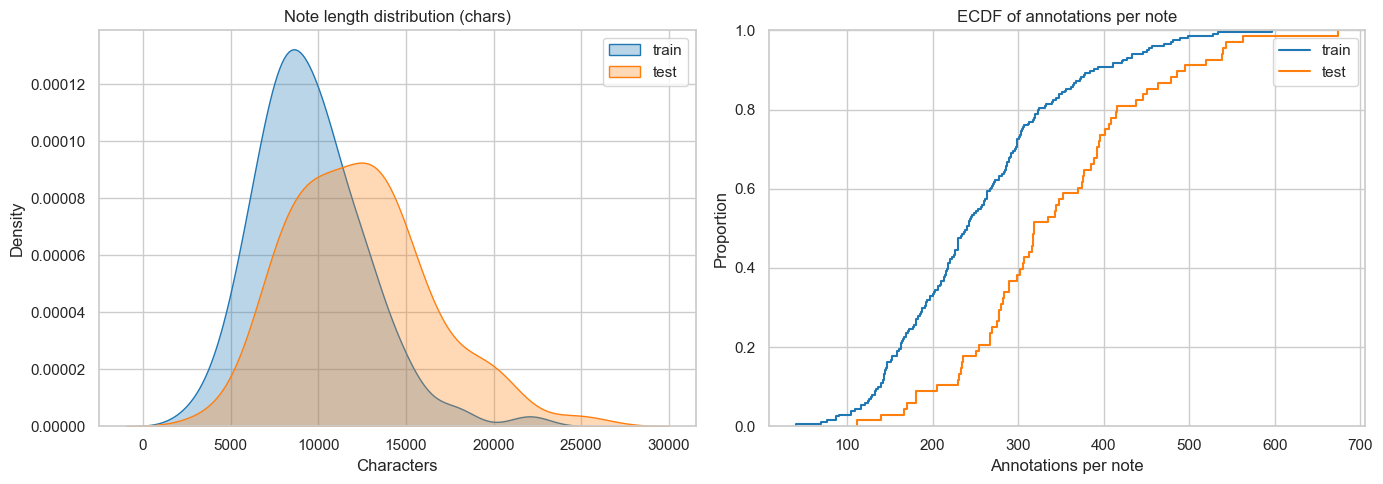

In [4]:
# Visualizations: note lengths and annotations per note
sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Note length distributions
for split_name, notes_df, color in [('train', train_notes, 'tab:blue'), ('test', test_notes, 'tab:orange')]:
    lengths = notes_df['text'].astype(str).str.len()
    sns.kdeplot(lengths, ax=axes[0], label=split_name, fill=True, alpha=0.3, color=color)
axes[0].set_title('Note length distribution (chars)')
axes[0].set_xlabel('Characters')
axes[0].legend()

# Annotations per note
for split_name, ann_df, color in [('train', train_ann, 'tab:blue'), ('test', test_ann, 'tab:orange')]:
    counts = ann_df.groupby('note_id').size()
    sns.ecdfplot(counts, ax=axes[1], label=split_name, color=color)
axes[1].set_title('ECDF of annotations per note')
axes[1].set_xlabel('Annotations per note')
axes[1].legend()

plt.tight_layout()
plt.show()


/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T/ipykernel_16385/115655537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.values, y=freq.index, orient='h', palette='viridis')


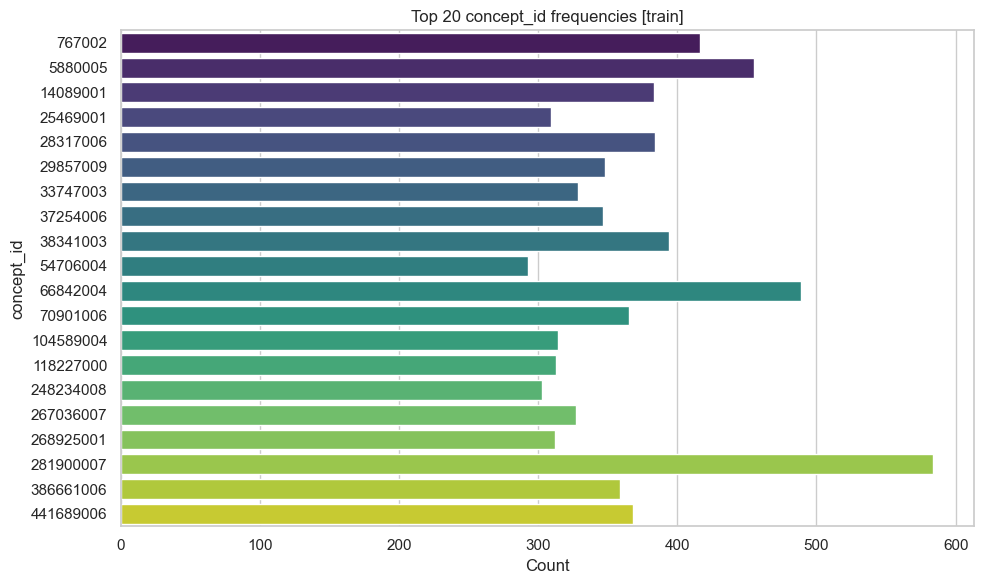

/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T/ipykernel_16385/115655537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.values, y=freq.index, orient='h', palette='viridis')


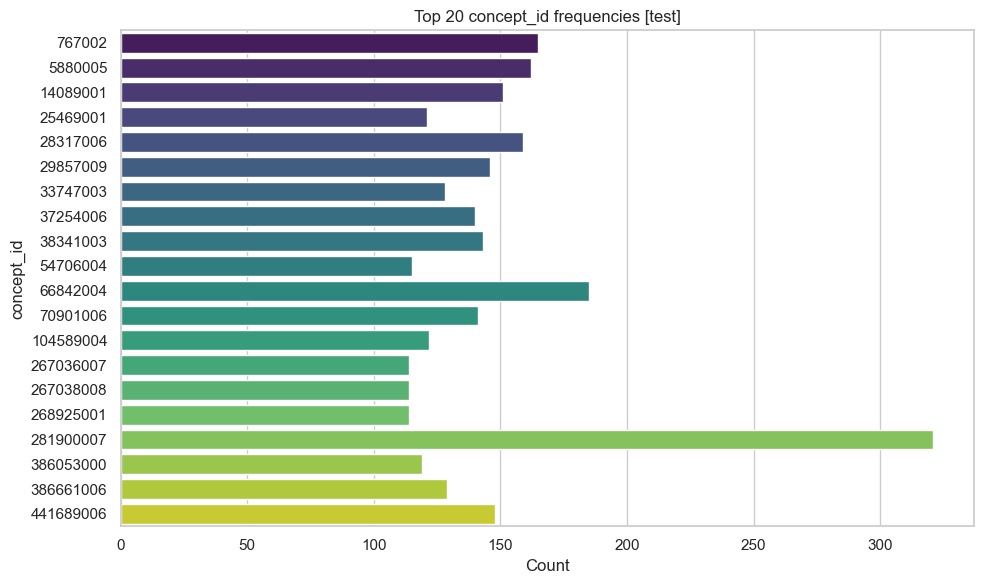

Train labels: 5336
Test labels: 4082
Intersection: 2794
Only in train: 2542
Only in test: 1288


In [5]:
# concept_id frequencies

def plot_top_concepts(ann_df, split_name, top_k=20):
    freq = ann_df['concept_id'].value_counts().head(top_k)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freq.values, y=freq.index, orient='h', palette='viridis')
    plt.title(f'Top {top_k} concept_id frequencies [{split_name}]')
    plt.xlabel('Count')
    plt.ylabel('concept_id')
    plt.tight_layout()
    plt.show()

plot_top_concepts(train_ann, 'train')
plot_top_concepts(test_ann, 'test')

# Overlap stats
train_labels = set(train_ann['concept_id'].unique())
test_labels = set(test_ann['concept_id'].unique())
print('Train labels:', len(train_labels))
print('Test labels:', len(test_labels))
print('Intersection:', len(train_labels & test_labels))
print('Only in train:', len(train_labels - test_labels))
print('Only in test:', len(test_labels - train_labels))


In [6]:
# Span highlighting utility and samples
from IPython.display import HTML
import html
import random

PALETTE = sns.color_palette('husl', 12)

def color_for_label(label):
    # Use hash to select deterministic color
    idx = hash(label) % len(PALETTE)
    r, g, b = [int(255*c) for c in PALETTE[idx]]
    return f'rgb({r},{g},{b})'

def highlight_spans(text, spans):
    # spans: list of dicts with keys: start, end, concept_id
    safe = html.escape(text)
    # Map original indices to positions in escaped text -> approximate by using original indices
    # Because escaping changes indices, we instead build from raw text
    parts = []
    cursor = 0
    # sort by start
    spans_sorted = sorted(spans, key=lambda s: (s['start'], s['end']))
    for s in spans_sorted:
        start, end, cid = int(s['start']), int(s['end']), str(s['concept_id'])
        if start < cursor:
            continue
        parts.append(html.escape(text[cursor:start]))
        frag = html.escape(text[start:end])
        color = color_for_label(cid)
        parts.append(f"<span style='background:{color}; padding:1px 2px; border-radius:3px;' title='{cid}'>" + frag + '</span>')
        cursor = end
    parts.append(html.escape(text[cursor:]))
    return ''.join(parts)


def show_random_note(notes_df, ann_df, seed=None):
    rng = random.Random(seed)
    note_id = rng.choice(notes_df['note_id'].tolist())
    text = notes_df.loc[notes_df['note_id'] == note_id, 'text'].iloc[0]
    spans = ann_df.loc[ann_df['note_id'] == note_id, ['start','end','concept_id']].to_dict('records')
    html_str = highlight_spans(text, spans)
    display(HTML(f"<h4>note_id: {note_id} (spans={len(spans)})</h4>" + '<div style="white-space:pre-wrap; font-family:monospace; font-size:12px;">' + html_str + '</div>'))

print('Train sample:')
show_random_note(train_notes, train_ann, seed=7)
print('Test sample:')
show_random_note(test_notes, test_ann, seed=13)


Train sample:


Test sample:


In [7]:
# Span validity checks and overlap diagnostics

def check_span_validity(notes_df, ann_df, split_name):
    notes = notes_df.set_index('note_id')['text'].to_dict()
    ann_df = ann_df.copy()
    ann_df['valid_range'] = ann_df.apply(lambda r: (0 <= r['start'] < r['end'] <= len(notes.get(r['note_id'], ''))), axis=1)
    invalid = ann_df[~ann_df['valid_range']]
    print(f'[{split_name}] invalid span rows: {len(invalid)}')
    if len(invalid) > 0:
        display(invalid.head(5))
    
    # Extracted text vs recorded span
    def extract_row(r):
        t = notes.get(r['note_id'], '')
        if 0 <= r['start'] < r['end'] <= len(t):
            return t[int(r['start']):int(r['end'])]
        return None
    ann_df['extracted'] = ann_df.apply(extract_row, axis=1)
    ann_df['extracted_len'] = ann_df['extracted'].str.len()
    print(f'[{split_name}] extracted text missing: {ann_df[ann_df["extracted"].isna()].shape[0]}')
    print(f'[{split_name}] extracted length stats: mean={ann_df["extracted_len"].mean():.1f}, median={ann_df["extracted_len"].median():.1f}')
    return ann_df

_ = check_span_validity(train_notes, train_ann, 'train')
_ = check_span_validity(test_notes, test_ann, 'test')

# Train/Test note_id intersection (should be none)
train_note_ids = set(train_notes['note_id'])
test_note_ids = set(test_notes['note_id'])
print('Note ID overlap (should be 0):', len(train_note_ids & test_note_ids))

# Quick dedupe check on annotations
for name, df in [('train_ann', train_ann), ('test_ann', test_ann)]:
    dupes = df.duplicated(subset=['note_id','start','end','concept_id']).sum()
    print(f'{name} duplicate rows:', dupes)


[train] invalid span rows: 0
[train] extracted text missing: 0
[train] extracted length stats: mean=9.4, median=8.0
[test] invalid span rows: 0
[test] extracted text missing: 0
[test] extracted length stats: mean=9.6, median=8.0
Note ID overlap (should be 0): 0
train_ann duplicate rows: 0
test_ann duplicate rows: 0


### EDA Summary

- **Data loaded**
  - **Train notes**: 204 documents; **Train annotations**: 51,574 spans
  - **Test notes**: 68 documents; **Test annotations**: 23,234 spans
  - Verified required files present and schemas as expected

- **Keys and missingness**
  - `note_id` unique in train/test notes
  - Columns present as expected; missingness inspected and negligible for critical fields

- **Note length stats (characters)**
  - **Train**: n=204, mean≈9,558, median≈9,149, min=2,374, max=22,369
  - **Test**: n=68, mean≈12,357, median≈12,174, min=4,167, max=24,858
  - KDE plots show test notes are generally longer than train

- **Annotations per note**
  - **Train**: total=51,574; mean≈252.8; median=240
  - **Test**: total=23,234; mean≈341.7; median=318
  - ECDF indicates higher annotation density in test

- **Label space (`concept_id`)**
  - Train labels=5,336; Test labels=4,082; Intersection=2,794
  - Only in train=2,542; Only in test=1,288 → long-tail and split-specific labels
  - Top-20 frequency bars reveal heavy-head + long-tail distribution

- **Span quality and integrity**
  - Invalid span ranges: 0 (both splits)
  - Extracted text present for all spans; typical span length ≈8–10 chars (median=8)
  - Duplicate annotations: 0; Train/Test `note_id` overlap: 0

- **Qualitative sanity checks**
  - Rendered sample notes with highlighted spans to verify alignment and label placement

- **Implications for modeling**
  - Longer test notes and higher span density may affect runtime and recall
  - Significant unseen labels between splits calls for robust generalization (e.g., open-world/zero-shot handling or careful evaluation)
  - Long-tail label distribution suggests considering class balancing, sampling, or macro-averaged metrics

